In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import set_style
import numpy as np
import pandas as pd
set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (15, 10)

In [2]:
data = pd.read_csv(r'C:\Users\Praveen Shahani\Desktop\listings.csv')

In [3]:
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,777451666060243581,https://www.airbnb.com/rooms/777451666060243581,20230307175359,2023-03-07,city scrape,Family oriented home,Relax with the whole family at this peaceful p...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,490709958,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,698097753730921190,https://www.airbnb.com/rooms/698097753730921190,20230307175359,2023-03-07,city scrape,方便易居驿站,NaN,NaN,https://a0.muscache.com/pictures/d5afff58-d576...,444692513,...,5.00,5.00,4.40,NaN,f,4,0,4,0,0.86
2,13063118,https://www.airbnb.com/rooms/13063118,20230307175359,2023-03-07,city scrape,TERRANEA OCEANFRNT 1BR CASITA -203 RSRT AMENIT...,LOCATION! Luxury upstairs Oceanside Casita gue...,No need to fly away from Los Angeles for a get...,https://a0.muscache.com/pictures/6227287c-7073...,41736985,...,4.96,4.92,4.83,NaN,f,10,5,5,0,0.64
3,39337076,https://www.airbnb.com/rooms/39337076,20230307175359,2023-03-07,city scrape,Brand New Duplex Near World Cruise Center,Welcome to our new cozy duplex!<br /><br />Loc...,"Our property is close to downtown San Pedro, t...",https://a0.muscache.com/pictures/miso/Hosting-...,208375458,...,4.86,4.66,4.82,NaN,t,4,0,4,0,1.09
4,13077628,https://www.airbnb.com/rooms/13077628,20230307175359,2023-03-07,city scrape,Zuma Malibu Retreat,Our Private 16 Acre Malibu Retreat is located ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,4182067,...,4.79,4.64,4.36,STR21-0228,f,1,1,0,0,0.18


In [4]:
## Limiting to Los Angeles Area
df = data[data['host_location']=='Los Angeles, CA'].copy()

In [5]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
5,51859630,https://www.airbnb.com/rooms/51859630,20230307175359,2023-03-09,city scrape,"Single BR with King size bed, and shared bathroom",Gorgeous updated 1929 Craftsman Style Home loc...,Central San Pedro offers easy access to Port a...,https://a0.muscache.com/pictures/6ae55106-d3e8...,28407733,...,5.0,5.00,5.00,NaN,f,1,0,1,0,3.00
13,572675887071118399,https://www.airbnb.com/rooms/572675887071118399,20230307175359,2023-03-07,city scrape,A Perfect Brand New Family Home Close 2 Disney...,Looking for a place to go back after a fun day...,- A quiet middle class neighborhood<br />- The...,https://a0.muscache.com/pictures/miso/Hosting-...,10035468,...,5.0,4.83,4.91,NaN,t,22,22,0,0,2.92
17,15910220,https://www.airbnb.com/rooms/15910220,20230307175359,2023-03-07,city scrape,Master Suite,Master Suite with private bathroom in a single...,NaN,https://a0.muscache.com/pictures/67ea86c8-49f9...,88810222,...,5.0,5.00,5.00,NaN,f,3,2,1,0,0.01
21,770565020594037590,https://www.airbnb.com/rooms/770565020594037590,20230307175359,2023-03-07,city scrape,Phillips Ranch room with a view,This private room with shared bathroom is loca...,NaN,https://a0.muscache.com/pictures/e814e165-9251...,30603612,...,5.0,5.00,5.00,NaN,f,5,3,2,0,0.42
22,650691877056201893,https://www.airbnb.com/rooms/650691877056201893,20230307175359,2023-03-07,city scrape,"Amazing South Bay House Next to LAX, SOFI, Bea...",Welcome to this beautiful renovated home in th...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,10035468,...,5.0,4.90,4.86,NaN,t,22,22,0,0,2.67


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19013 entries, 5 to 42449
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            19013 non-null  int64  
 1   listing_url                                   19013 non-null  object 
 2   scrape_id                                     19013 non-null  int64  
 3   last_scraped                                  19013 non-null  object 
 4   source                                        19013 non-null  object 
 5   name                                          19013 non-null  object 
 6   description                                   18722 non-null  object 
 7   neighborhood_overview                         12452 non-null  object 
 8   picture_url                                   19013 non-null  object 
 9   host_id                                       19013 non-null 

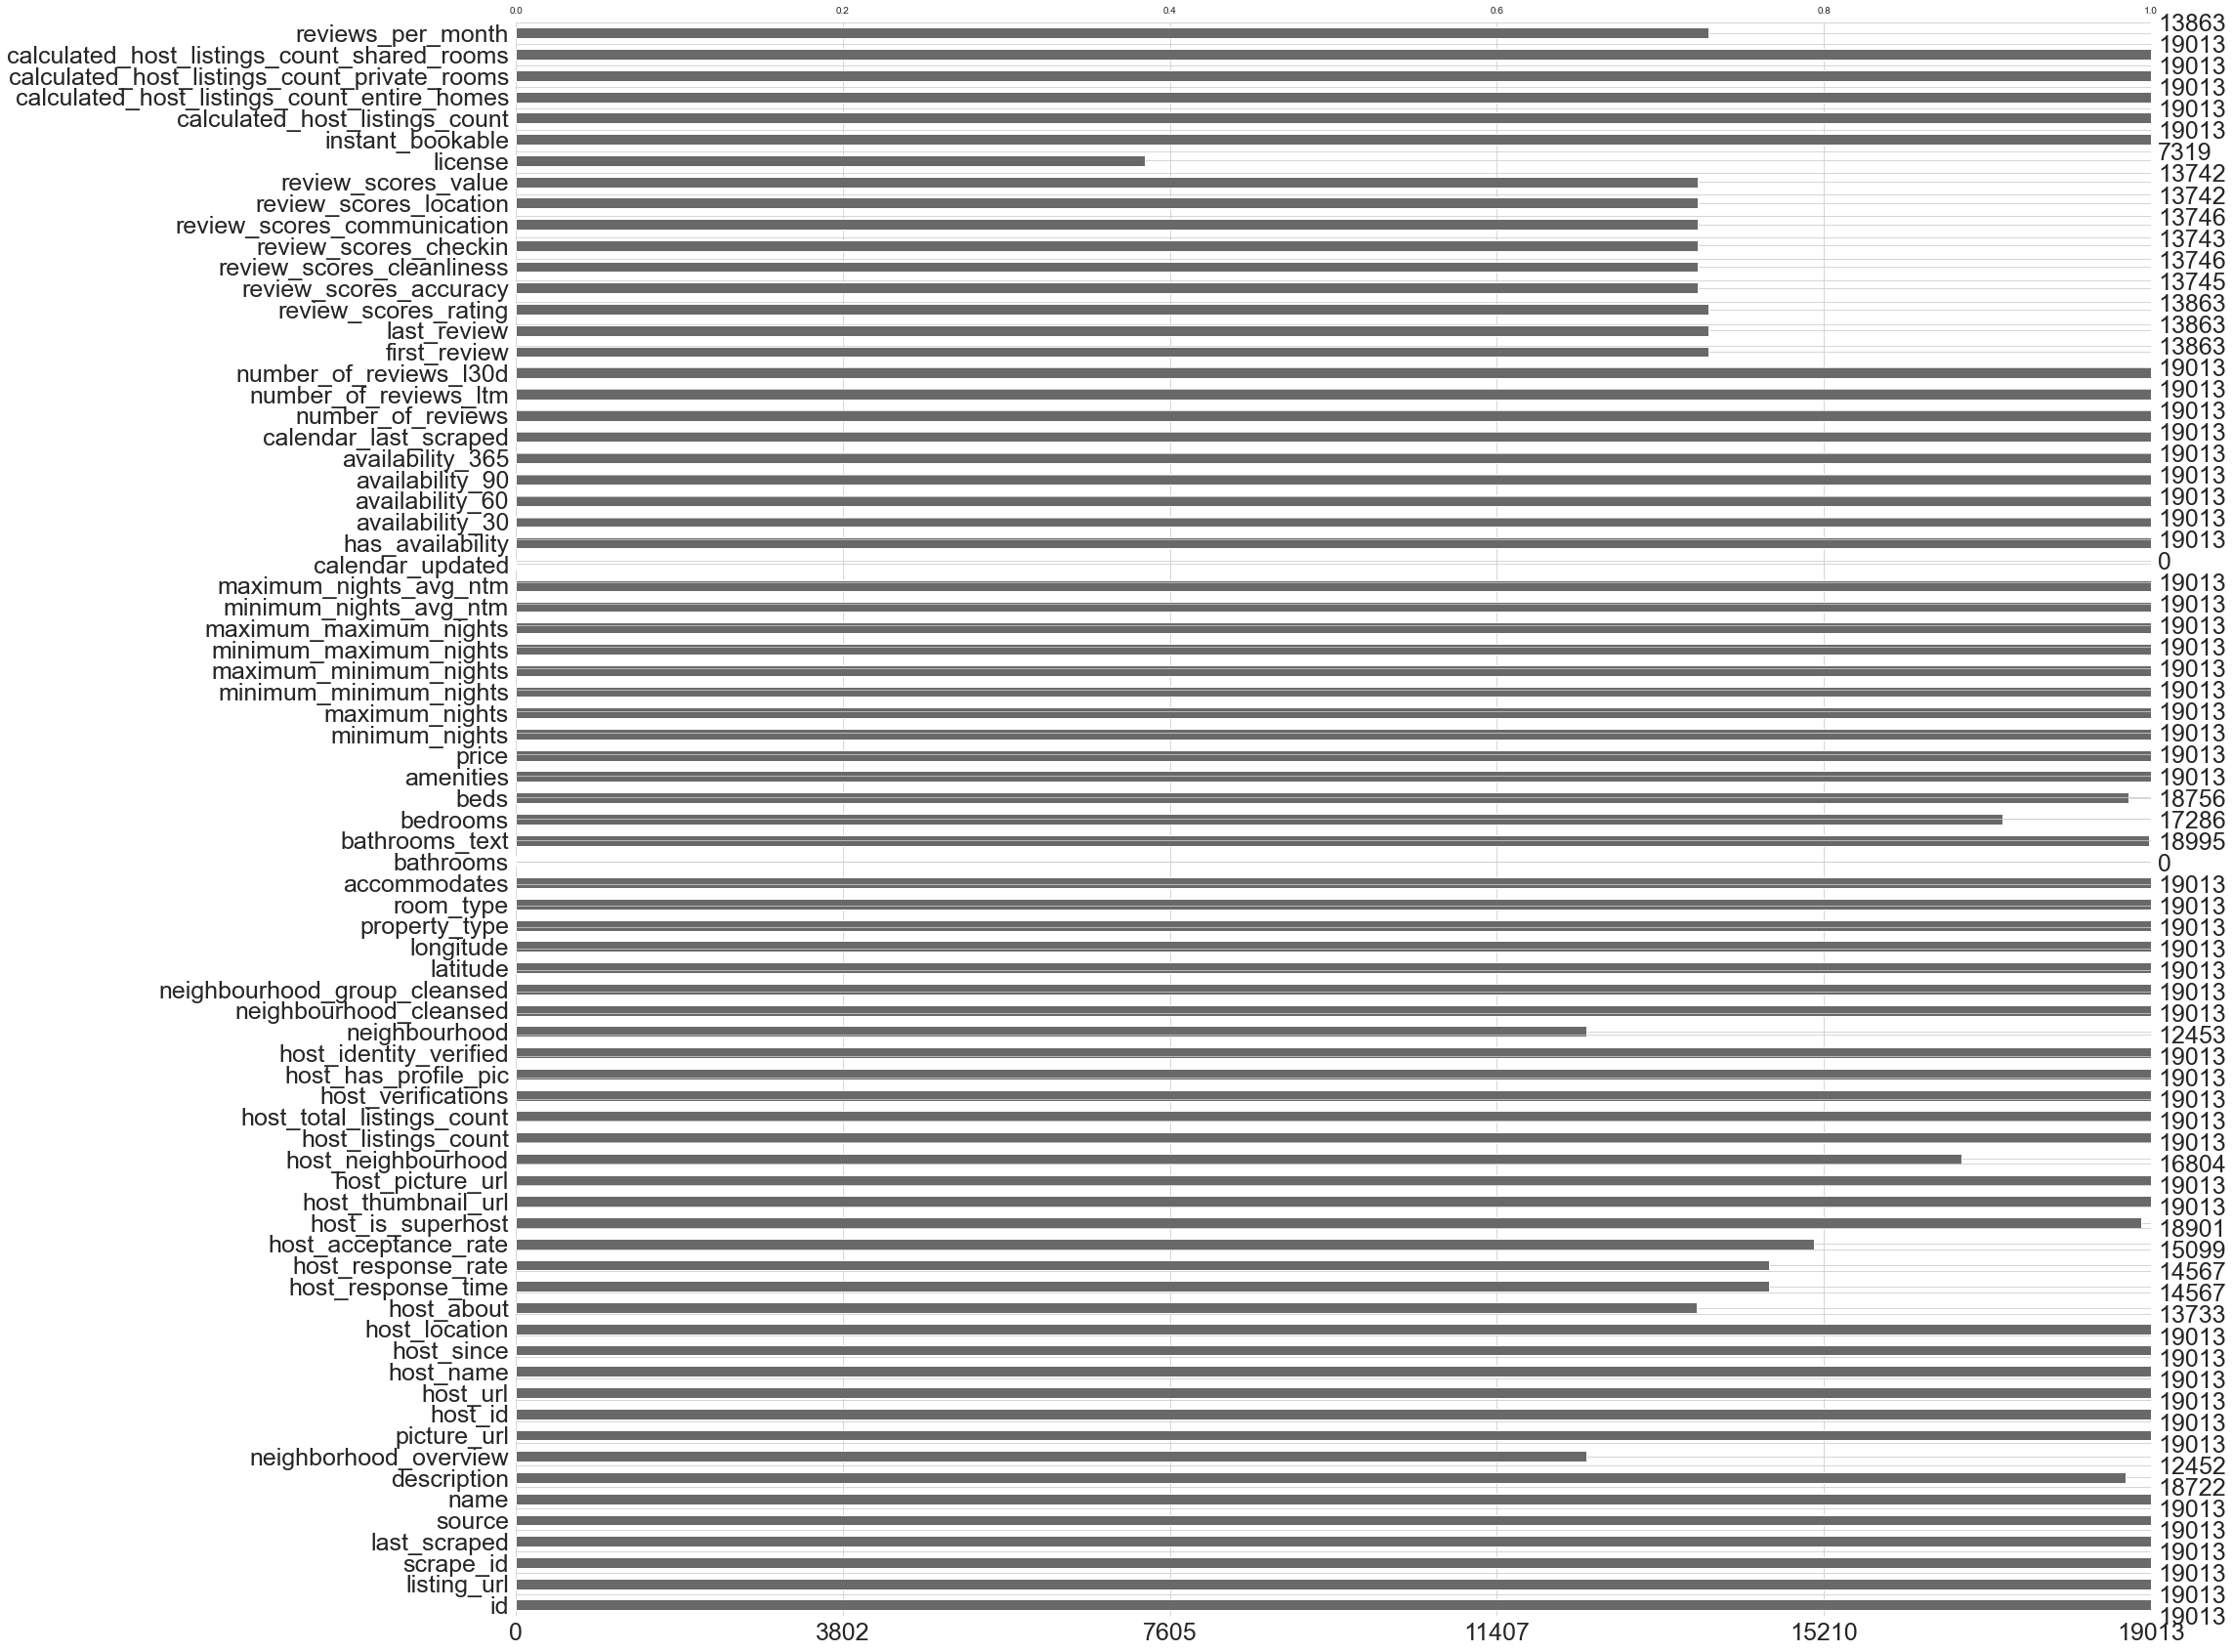

In [7]:
import missingno
missingno.bar(df, figsize=(30,30), fontsize=25);

In [8]:
## getting into more specifics
miss_col = []
for column in df.columns:
    if df[column].isnull().sum() != 0:
        print("=======================================================")
        print(f"{column} ==> Missing Values : {df[column].isnull().sum()}, dtypes : {df[column].dtypes}")
        miss_col.append(column)

description ==> Missing Values : 291, dtypes : object
neighborhood_overview ==> Missing Values : 6561, dtypes : object
host_about ==> Missing Values : 5280, dtypes : object
host_response_time ==> Missing Values : 4446, dtypes : object
host_response_rate ==> Missing Values : 4446, dtypes : object
host_acceptance_rate ==> Missing Values : 3914, dtypes : object
host_is_superhost ==> Missing Values : 112, dtypes : object
host_neighbourhood ==> Missing Values : 2209, dtypes : object
neighbourhood ==> Missing Values : 6560, dtypes : object
bathrooms ==> Missing Values : 19013, dtypes : float64
bathrooms_text ==> Missing Values : 18, dtypes : object
bedrooms ==> Missing Values : 1727, dtypes : float64
beds ==> Missing Values : 257, dtypes : float64
calendar_updated ==> Missing Values : 19013, dtypes : float64
first_review ==> Missing Values : 5150, dtypes : object
last_review ==> Missing Values : 5150, dtypes : object
review_scores_rating ==> Missing Values : 5150, dtypes : float64
review_sco

In [9]:
## having a look over the columns values containing set of missing values
for i in miss_col:
    print(i)
    print(df[i].values)
    print('=====================================================================')

description
['Gorgeous updated 1929 Craftsman Style Home located in Central San Pedro 20 Mi from LAX/24 Mi from DTLA, <9 MI to DTLB and LB Cruise Terminal.  Plenty of exterior gated parking with RING camera for added security.<br /><br />Walking distance to public transportation and downtown San Pedro restaurants and bars including cruise terminals.<br /><br /><b>The space</b><br />Close to Port of LA Cruise Terminal, and Waterfront. Walking distance to downtown San Pedro with many ethnic dining choices.<br /><br /><b>Guest access</b><br />Home includes off Street driveway parking, full kitchen and laundry room shared with Host only.<br /><br /><b>Other things to note</b><br />There is a private screen shaded smoking area outside with chair and tables.'
 'Looking for a place to go back after a fun day at Disneyland? This is it! Our house is a brand new construction with professional design furniture and landscape for a family or a group of friends to really enjoy the experience of sout

We suspect that some features such as `bathroom` and `calendar_update` has all null values and contributes nothing to the dataset. Hence have to be completely removed

In [10]:
df.drop(['bathrooms','calendar_updated'],axis=1,inplace=True)

The features of `Description` and `neighborhood_overview` are in textual format so would not be able to impute. Rather than removing all the values, we can replace the null values from `no_text_provided`

In [11]:
df["description"].fillna("No text provided", inplace = True)
df['description']=df['description'].str.replace('<br />','')
df['description']=df['description'].str.replace('<b>','')
df['description']=df['description'].str.replace('</b>','')
df['description']=df['description'].str.replace('<','')
df['description']=df['description'].str.replace('>','')
df['description']=df['description'].str.replace('\n','')


df["neighborhood_overview"].fillna("No text provided", inplace = True)
df['neighborhood_overview']=df['neighborhood_overview'].str.replace('<br />','')
df['neighborhood_overview']=df['neighborhood_overview'].str.replace('<b>','')
df['neighborhood_overview']=df['neighborhood_overview'].str.replace('</b>','')
df['neighborhood_overview']=df['neighborhood_overview'].str.replace('<','')
df['neighborhood_overview']=df['neighborhood_overview'].str.replace('>','')
df['neighborhood_overview']=df['neighborhood_overview'].str.replace('\n','')

df["host_about"].fillna("No text provided", inplace = True)
df['host_about']=df['host_about'].str.replace('<br />','')
df['host_about']=df['host_about'].str.replace('<b>','')
df['host_about']=df['host_about'].str.replace('</b>','')
df['host_about']=df['host_about'].str.replace('<','')
df['host_about']=df['host_about'].str.replace('>','')
df['host_about']=df['host_about'].str.replace('\n','')


In [12]:
print(df['description'].isnull().sum())
print(df['neighborhood_overview'].isnull().sum())
print(df['host_about'].isnull().sum())

0
0
0


The features `first_review` and `last_review` are in the object format. We first have to convert it into datetime format. Handling with null values, imputing may not work here, so removing the null values.

We can directly use the .dropna() function but after dealing with all the features

In [13]:
df['first_review'] = pd.to_datetime(df['first_review'])
df['last_review'] = pd.to_datetime(df['last_review'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19013 entries, 5 to 42449
Data columns (total 73 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            19013 non-null  int64         
 1   listing_url                                   19013 non-null  object        
 2   scrape_id                                     19013 non-null  int64         
 3   last_scraped                                  19013 non-null  object        
 4   source                                        19013 non-null  object        
 5   name                                          19013 non-null  object        
 6   description                                   19013 non-null  object        
 7   neighborhood_overview                         19013 non-null  object        
 8   picture_url                                   19013 non-null  obje

In [15]:
df['first_review']=df['first_review'].fillna('0000-00-00')
df['last_review']=df['last_review'].fillna('0000-00-00')

In [16]:
print(df['first_review'].isnull().sum())
print(df['last_review'].isnull().sum())

0
0


There are certain features such as `host_response_time` and `host_is_superhost`, where we can allocate a specific number convenient for analysis.

In [17]:
df['host_response_time']=df['host_response_time'].replace('within an hour',1)
df['host_response_time']=df['host_response_time'].replace('within a few hours',2)
df['host_response_time']=df['host_response_time'].replace('within a day',3)
df['host_response_time']=df['host_response_time'].replace('a few days or more',4)
df['host_response_time']=df['host_response_time'].replace(np.nan,0)
df['host_is_superhost']=df['host_is_superhost'].replace('f',1)
df['host_is_superhost']=df['host_is_superhost'].replace('t',2)
df['host_is_superhost']=df['host_is_superhost'].replace(np.nan,0)

Working on `host_response_rate` and `host_acceptance_rate`. These are in the object type format due to % in it. Therefore, removing the `%` sign and converting the object to float type

In [18]:
df['host_response_rate'].unique()

array(['100%', nan, '50%', '69%', '99%', '91%', '92%', '98%', '75%',
       '90%', '84%', '80%', '0%', '79%', '67%', '44%', '78%', '30%',
       '20%', '97%', '86%', '82%', '88%', '83%', '96%', '95%', '94%',
       '81%', '73%', '93%', '89%', '85%', '64%', '60%', '61%', '33%',
       '70%', '17%', '71%', '63%', '38%', '87%', '40%', '57%', '29%',
       '77%', '43%', '62%', '14%', '56%', '53%', '25%'], dtype=object)

In [19]:
df['host_response_rate']=df['host_response_rate'].str.replace('%','').astype('float')
df['host_response_rate'].unique()

array([100.,  nan,  50.,  69.,  99.,  91.,  92.,  98.,  75.,  90.,  84.,
        80.,   0.,  79.,  67.,  44.,  78.,  30.,  20.,  97.,  86.,  82.,
        88.,  83.,  96.,  95.,  94.,  81.,  73.,  93.,  89.,  85.,  64.,
        60.,  61.,  33.,  70.,  17.,  71.,  63.,  38.,  87.,  40.,  57.,
        29.,  77.,  43.,  62.,  14.,  56.,  53.,  25.])

<Axes: xlabel='host_response_rate', ylabel='Density'>

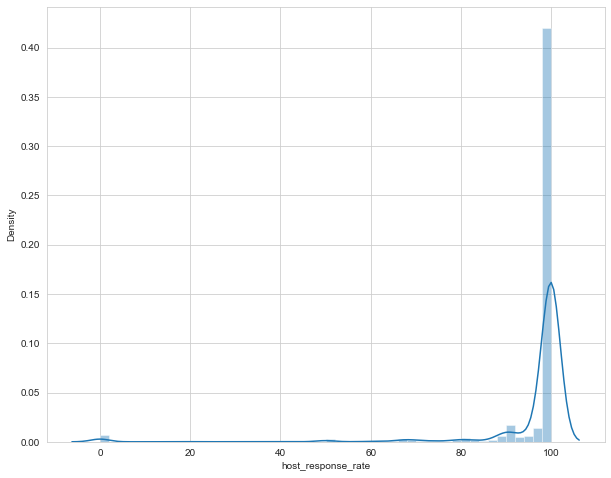

In [20]:
fig,ax = plt.subplots(figsize=(10,8))
sns.distplot(df['host_response_rate'])

In [21]:
df['host_response_rate'] = df['host_response_rate'].fillna(df['host_response_rate'].median())

In [22]:
df['host_response_rate'].isnull().sum()

0

<Axes: xlabel='host_acceptance_rate', ylabel='Density'>

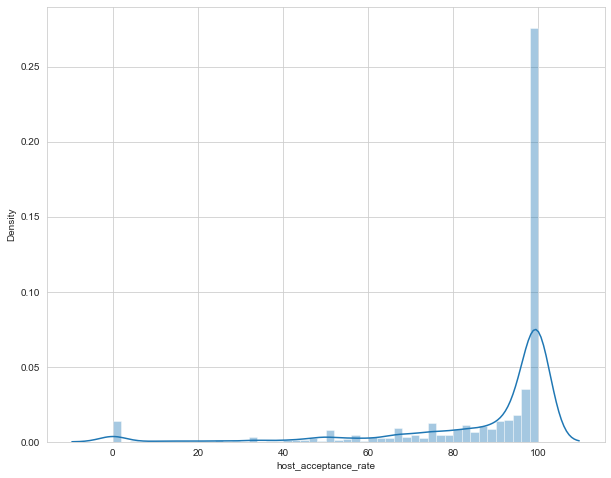

In [23]:
df['host_acceptance_rate']=df['host_acceptance_rate'].str.replace('%','').astype(float)
fig,ax = plt.subplots(figsize=(10,8))
sns.distplot(df['host_acceptance_rate'])

In [24]:
df['host_acceptance_rate'] = df['host_acceptance_rate'].fillna(df['host_acceptance_rate'].median())
df['host_acceptance_rate'].isnull().sum()

0

In [25]:
df['host_neighbourhood'].unique()

array(['San Pedro', 'South Los Angeles', nan, 'Altadena',
       'Granada Hills North', 'Walnut Valley', 'Montebello', 'Brentwood',
       'Westwood', 'Reseda', 'Central LA', 'Malibu', 'Venice',
       'Mar Vista', 'Sherman Oaks', 'Lawndale', 'Melrose', 'Hollywood',
       'Tri-West', 'Mid-Wilshire', 'Hollywood Hills', 'Laurel Canyon',
       'North Hollywood', 'Echo Park', 'Lake View Terrace',
       'Bel Air/Beverly Crest', 'Downtown', 'South LA', 'Sylmar',
       'Valley Village', 'Pacoima', 'East Hollywood', 'Canyon Country',
       'San Gabriel', 'Watts', 'Northeast Los Angeles', 'Northridge',
       'Inglewood', 'Woodland Hills/Warner Center', 'West Hollywood',
       'Summerwind', 'North Hills', 'Downtown Los Angeles', 'Mid City',
       'South Robertson', 'Highland Park', 'Tropico', 'Beverly Hills',
       'Eagle Rock', 'Hawthorne', 'West Los Angeles', 'Winnetka',
       'South Redondo', 'Lake Balboa', 'Van Nuys', 'West Adams',
       'Porter Ranch', 'Westlake', 'Westchester',


In [26]:
df['host_neighbourhood']=df['host_neighbourhood'].fillna('Not_provided')
df['host_neighbourhood'].isnull().sum()

0

In [27]:
df['license']

5                 NaN
13                NaN
17                NaN
21                NaN
22                NaN
             ...     
42438    HSR23-000454
42441      STR22-0025
42443             NaN
42447             NaN
42449             NaN
Name: license, Length: 19013, dtype: object

In [28]:
df['license']=df['license'].fillna('000')
df['license'].isnull().sum()

0

In [29]:
df['bathrooms_text'].unique()

array(['1 shared bath', '2 baths', '1 bath', '1 private bath', '3 baths',
       '1.5 baths', '1.5 shared baths', '2.5 baths', '4 baths',
       '4.5 baths', '11 baths', '3.5 baths', '2.5 shared baths',
       '7.5 baths', nan, '5.5 baths', '5 baths', '2 shared baths',
       '8 shared baths', '6 baths', '0 shared baths', '6.5 baths',
       '8 baths', '11 shared baths', '3.5 shared baths', '7 baths',
       '0 baths', '8.5 baths', '11.5 baths', '4 shared baths',
       '3 shared baths', '8.5 shared baths', '9 baths', 'Half-bath',
       '5.5 shared baths', '21.5 baths', '13.5 baths', 'Shared half-bath',
       '12 baths', '10 baths', '5 shared baths', '4.5 shared baths',
       '10 shared baths', '9.5 baths', '10.5 baths', 'Private half-bath'],
      dtype=object)

In [30]:
df['bathrooms_text']=df['bathrooms_text'].str.replace('baths','')
df['bathrooms_text']=df['bathrooms_text'].str.replace('bath','')
df['bathrooms_text']=df['bathrooms_text'].fillna('00')

In [31]:
df['bathrooms_text']

5         1 shared 
13               2 
17               1 
21       1 private 
22               3 
            ...    
42438    1 private 
42441           10 
42443     1 shared 
42447          2.5 
42449    1 private 
Name: bathrooms_text, Length: 19013, dtype: object

In [32]:
df['bathrooms_text'].isnull().sum()

0

In [33]:
df['neighbourhood'].unique()

array(['Los Angeles, California, United States',
       'Norwalk, California, United States', nan,
       'Montebello, California, United States',
       'Glendale, California, United States',
       'Redondo Beach, California, United States',
       'Beverly Hills, California, United States',
       'Bell, California, United States',
       'West Hollywood, California, United States',
       'San Pedro, California, United States',
       'Compton, California, United States',
       'Walnut, California, United States',
       'San Pedro Los Angeles, California, United States',
       'Agoura Hills, California, United States',
       'Torrance, California, United States',
       'Altadena, California, United States',
       'Alhambra, California, United States',
       'San Pedro , California, United States',
       'Hacienda Heights, California, United States',
       'Downey, California, United States',
       'Hawthorne, California, United States',
       'Acton, California, United S

In [34]:
df['neighbourhood']=df['neighbourhood'].str.replace('California','')
df['neighbourhood']=df['neighbourhood'].str.replace('加州','')
df['neighbourhood']=df['neighbourhood'].str.replace('United States','')
df['neighbourhood']=df['neighbourhood'].str.replace(',','')
df['neighbourhood']=df['neighbourhood'].str.replace('罗兰岗','Rowland Heights')
df['neighbourhood']=df['neighbourhood'].str.replace('因達斯特里','industri')
df['neighbourhood']=df['neighbourhood'].str.replace(' ca','')
df['neighbourhood']=df['neighbourhood'].str.replace(' Ca','')
df['neighbourhood']=df['neighbourhood'].str.replace(' CA','')
df['neighbourhood']=df['neighbourhood'].str.replace('Los Angeles','')
df['neighbourhood']=df['neighbourhood'].str.replace('USA','')
df['neighbourhood']=df['neighbourhood'].str.replace('US','')
df['neighbourhood']=df['neighbourhood'].str.replace('(LA)','')
df['neighbourhood']=df['neighbourhood'].str.replace('Los angeles','')
df['neighbourhood']=df['neighbourhood'].str.replace('LOS ANGELES','')
df['neighbourhood']=df['neighbourhood'].str.replace(' ','')
df['neighbourhood']=df['neighbourhood'].str.replace('/','')
#df['neighbourhood']=df['neighbourhood'].str.replace('()','')
df['neighbourhood']=df['neighbourhood'].replace(np.nan,'LA')
#df['neighbourhood']=df['neighbourhood'].replace('','LA')
#df['neighbourhood']=df['neighbourhood'].replace('Hills','')
#df['neighbourhood']=df['neighbourhood'].replace('City','')
#df['neighbourhood']=df['neighbourhood'].replace('HILLS','')
#df['neighbourhood']=df['neighbourhood'].replace('Hls','')
#df['neighbourhood']=df['neighbourhood'].replace('HILL','')
#df['neighbourhood']=df['neighbourhood'].str.replace(' ','LA')
#df['neighbourhood']=df['neighbourhood'].str.replace(np.nan,'LA')

In [35]:
df['neighbourhood'].isnull().sum()

0

The missing values of features, `reviews_per_month`, `review_scores_value`,`review_scores_location`,`review_scores_communication`,
`review_scores_checkin`,`review_scores_cleanliness`,`review_scores_accuracy`,
`review_scores_rating` can be handled by simple data imputation. 

In [36]:
df[['reviews_per_month','review_scores_value','review_scores_location','review_scores_communication','review_scores_checkin',
    'review_scores_cleanliness','review_scores_accuracy','review_scores_rating']].describe()

,reviews_per_month,review_scores_value,review_scores_location,review_scores_communication,review_scores_checkin,review_scores_cleanliness,review_scores_accuracy,review_scores_rating
count,13863.000000,13742.000000,13742.000000,13746.000000,13743.000000,13746.000000,13745.000000,13863.000000
mean,1.335655,4.696842,4.801188,4.859543,4.862534,4.725615,4.797622,4.730971
std,1.839475,0.438685,0.368214,0.366801,0.354328,0.456426,0.406677,0.588404
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,4.620000,4.750000,4.870000,4.870000,4.670000,4.760000,4.700000
50%,0.620000,4.800000,4.910000,4.980000,4.970000,4.870000,4.920000,4.890000
75%,1.930000,4.950000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,81.190000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Except the feature of `reviews per month`, there is not much deviation among measures of central tendency in other variables so dealing with them first.

Data has been imputed based on measure of central tendency, we usually impute data with mean when the data is not skewed and with median when data is numeric and not skewed. Mode is used when data is string or object.


`Source`: https://www.shiksha.com/online-courses/articles/handling-missing-data-mean-median-mode/

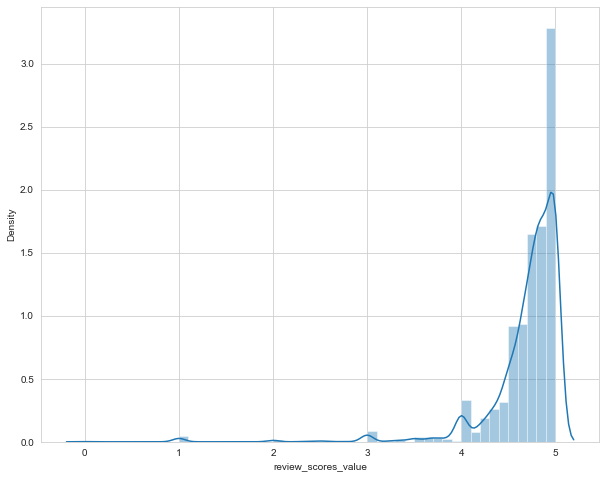

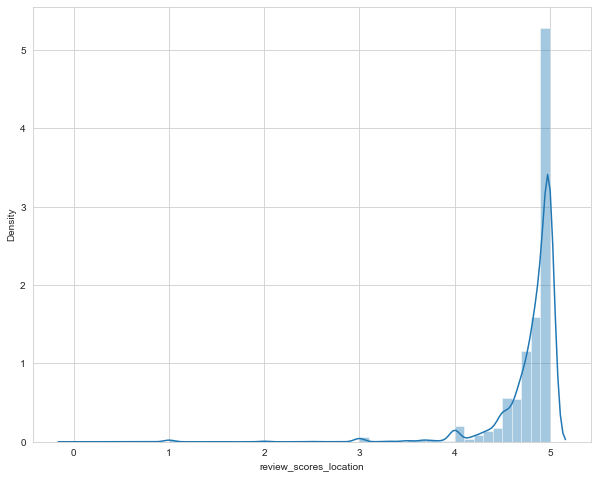

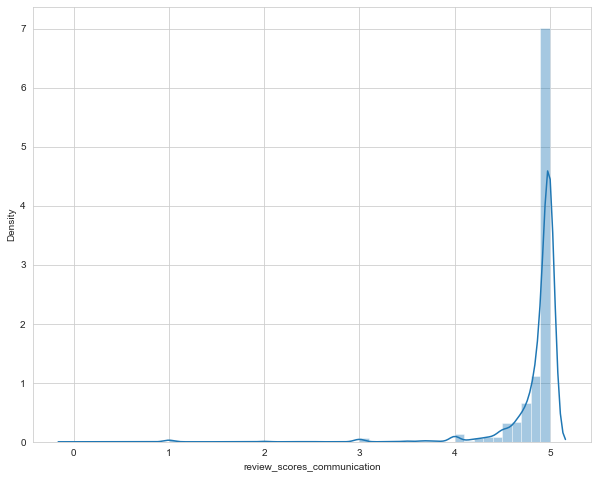

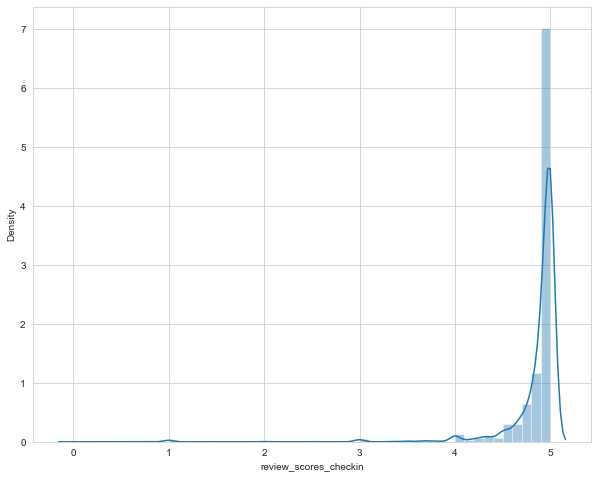

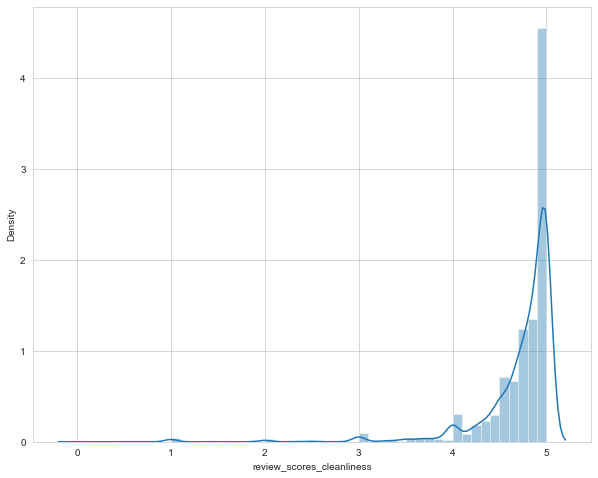

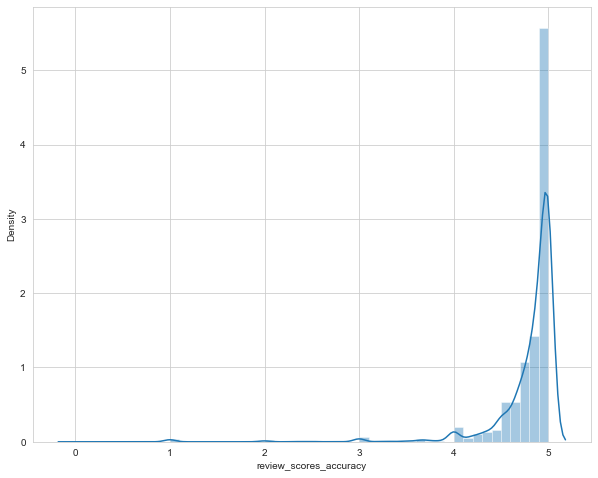

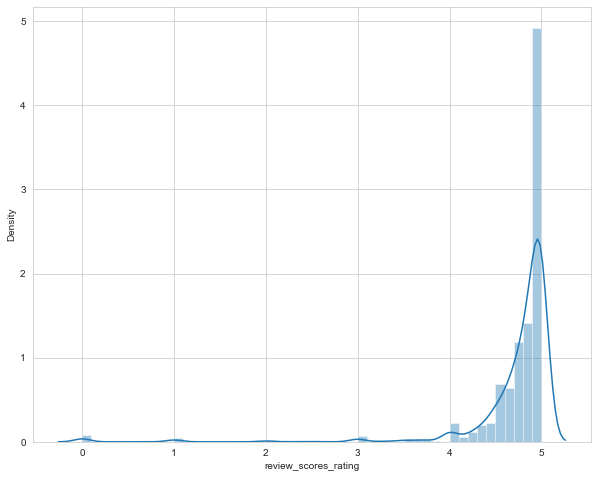

In [37]:
for i in df[['review_scores_value','review_scores_location','review_scores_communication','review_scores_checkin',
             'review_scores_cleanliness','review_scores_accuracy','review_scores_rating']]:
    fig,ax = plt.subplots(figsize=(10,8))
    #print(i)
    sns.distplot(df[i])

In [38]:
for i in df[['review_scores_value','review_scores_location','review_scores_communication','review_scores_checkin',
             'review_scores_cleanliness','review_scores_accuracy','review_scores_rating']]:
    df[i] = df[i].fillna(df[i].median())

In [39]:
for i in df[['review_scores_value','review_scores_location','review_scores_communication','review_scores_checkin',
             'review_scores_cleanliness','review_scores_accuracy','review_scores_rating']]:
    print(df[i].isnull().sum())

0
0
0
0
0
0
0


<Axes: xlabel='reviews_per_month', ylabel='Density'>

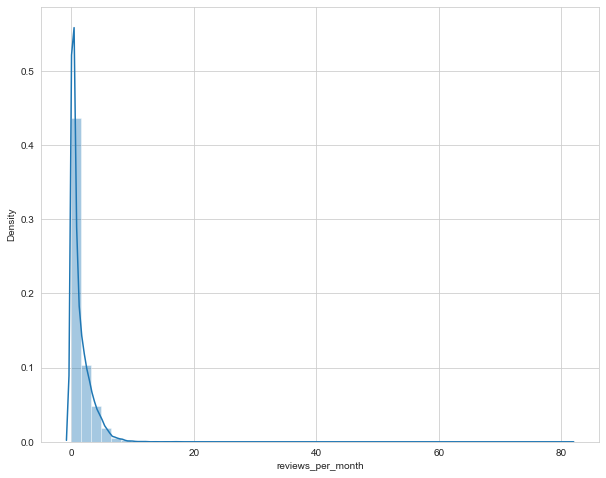

In [40]:
fig,ax = plt.subplots(figsize=(10,8))
#print(i)
sns.distplot(df['reviews_per_month'])

In [41]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(df['reviews_per_month'].median())

In [42]:
df['reviews_per_month'].isnull().sum()

0

`Beds` and `Bedrooms` are something that we cannot impute data, so for simplification of analysis, keeping the null values as 0.

In [43]:
df['bedrooms']

5        1.0
13       3.0
17       1.0
21       1.0
22       4.0
        ... 
42438    1.0
42441    6.0
42443    1.0
42447    1.0
42449    1.0
Name: bedrooms, Length: 19013, dtype: float64

In [44]:
df['bedrooms']=df['bedrooms'].fillna(0)

In [45]:
df['bedrooms'].isnull().sum()

0

In [46]:
df['beds']

5        2.0
13       4.0
17       1.0
21       1.0
22       5.0
        ... 
42438    1.0
42441    6.0
42443    1.0
42447    1.0
42449    1.0
Name: beds, Length: 19013, dtype: float64

In [47]:
df['beds']=df['beds'].fillna(0)
df['beds'].isnull().sum()

0

In [48]:
df['reviews_per_month']

5        3.00
13       2.92
17       0.01
21       0.42
22       2.67
         ... 
42438    0.62
42441    0.62
42443    1.00
42447    1.07
42449    3.77
Name: reviews_per_month, Length: 19013, dtype: float64

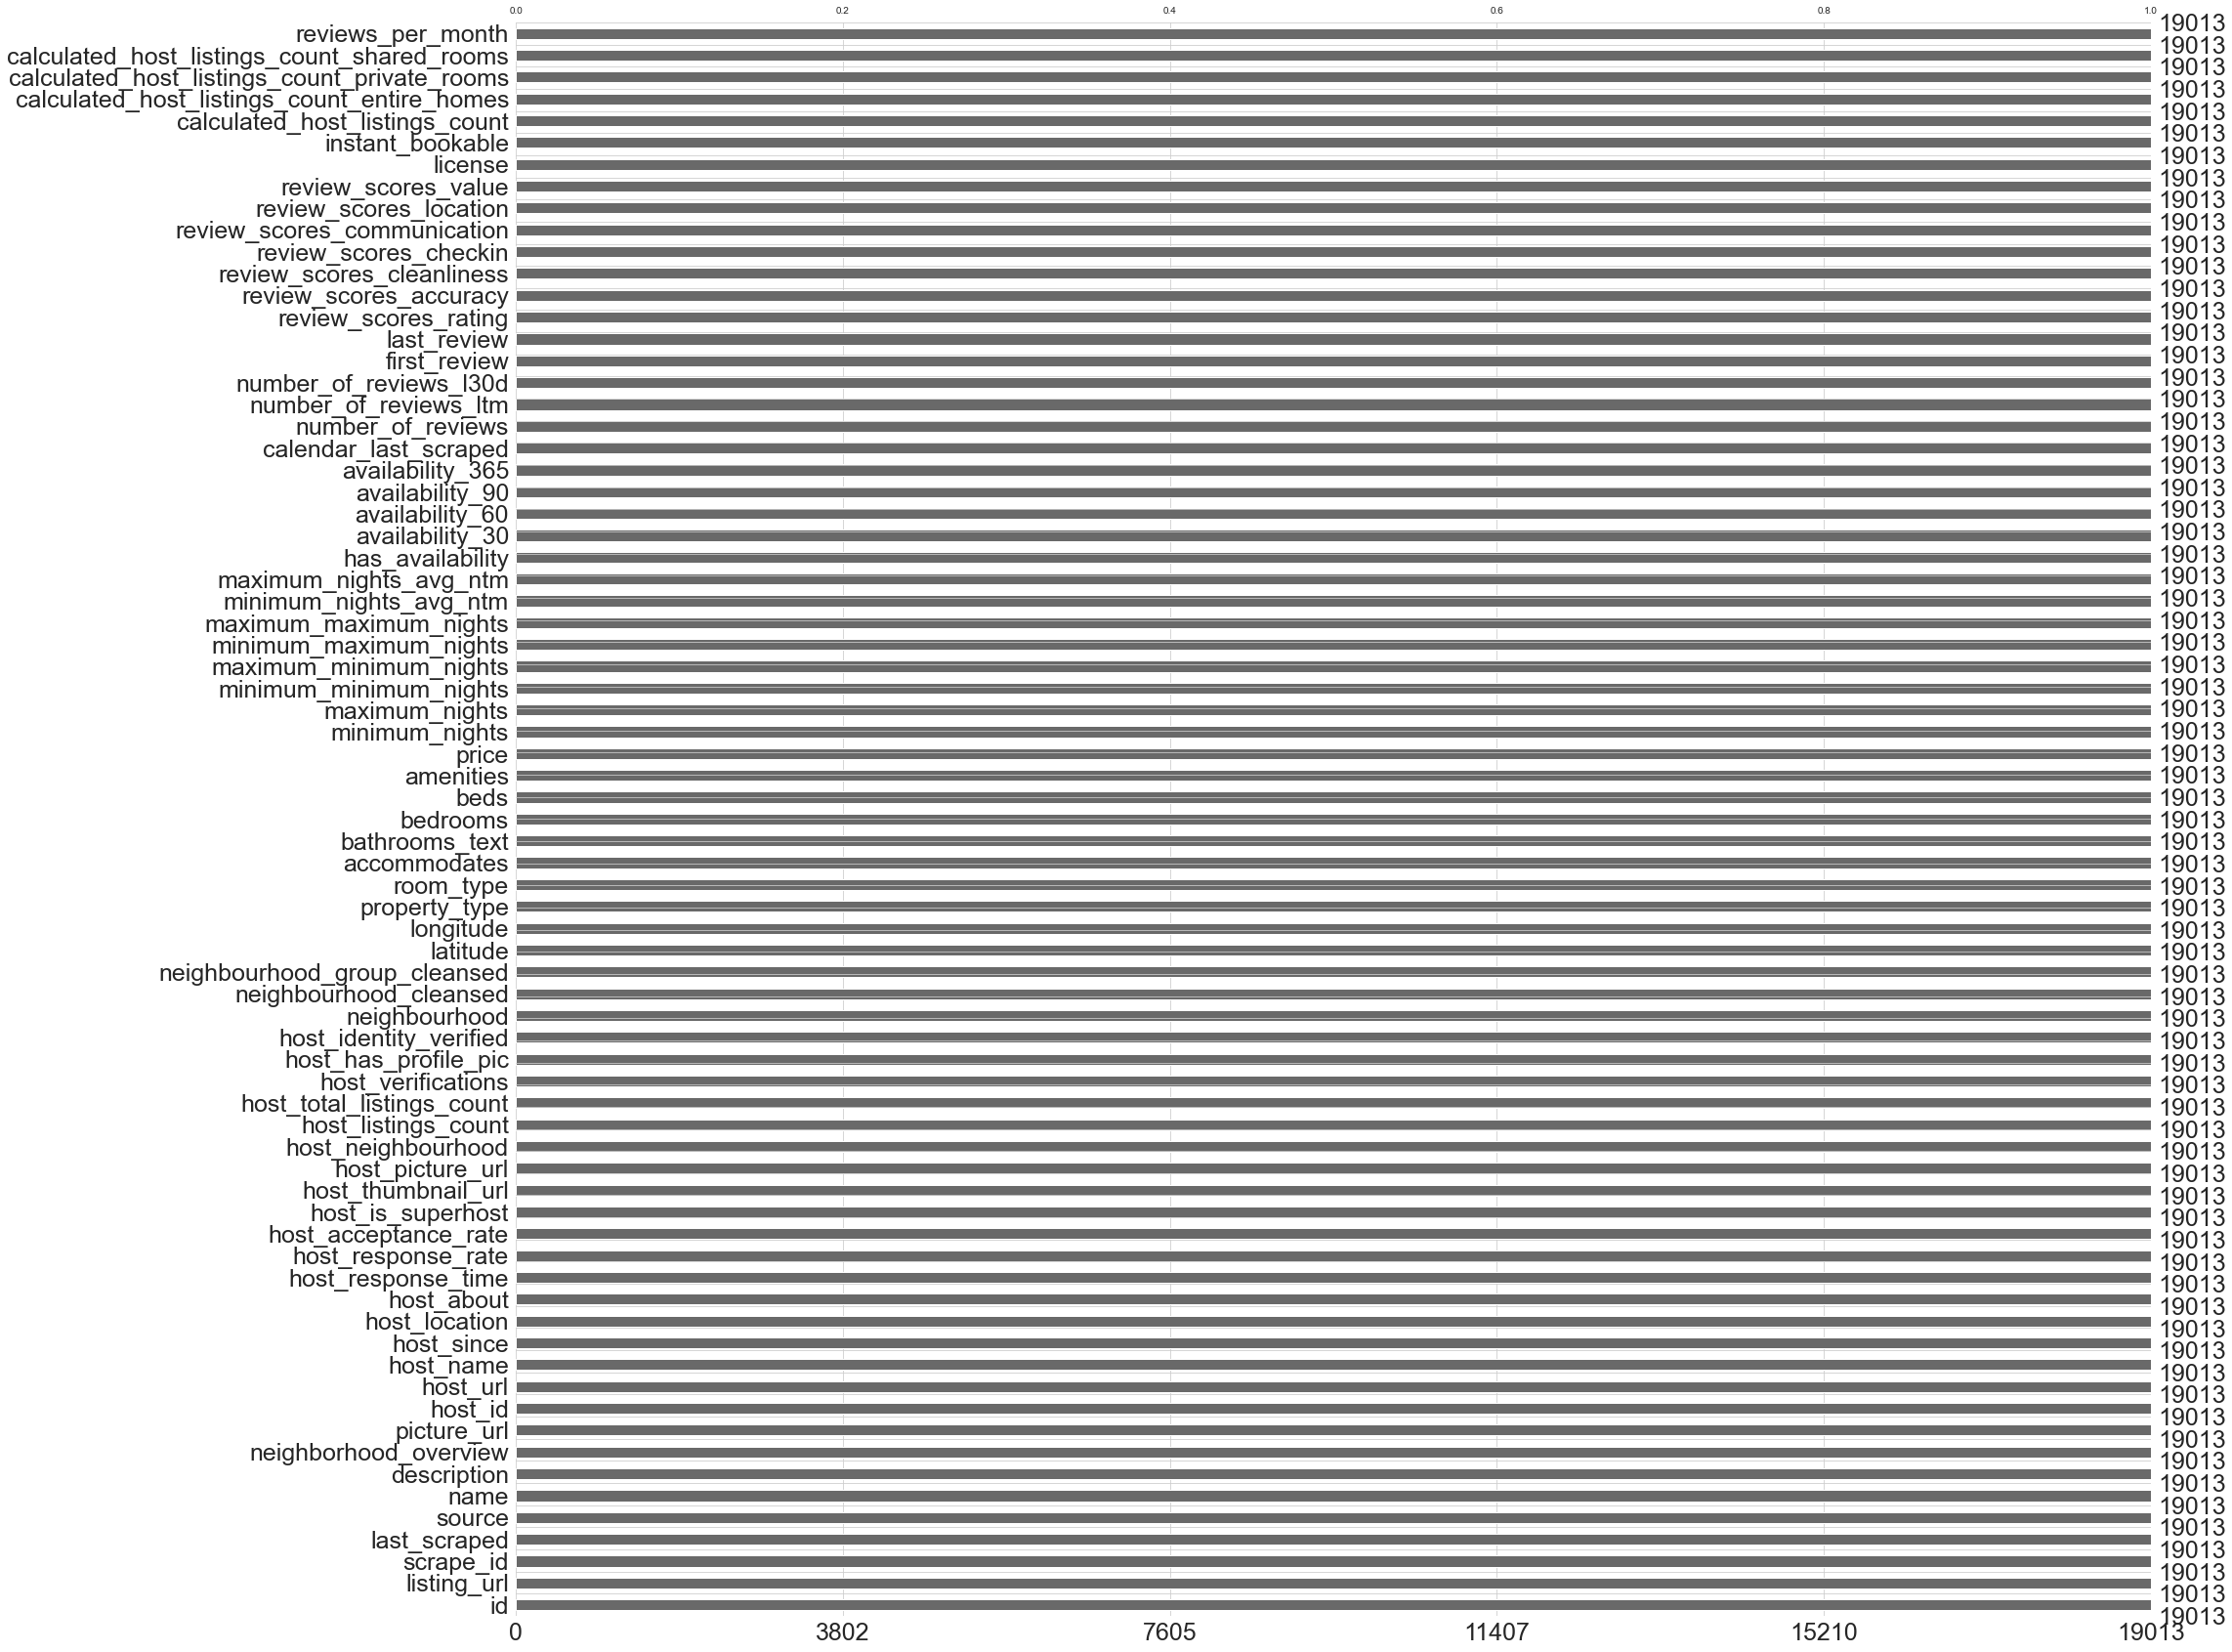

In [49]:
missingno.bar(df, figsize=(30,30), fontsize=25);

In [50]:
df.to_csv("cleaned_data_airbnb.csv")